In [1]:
print("ok")

ok


In [1]:
from Generator.NN import NNDenoiser
import torch
import torchvision.transforms as T
import os
import torch.nn as nn
from Generator.positional_encoding import positional_encoding

In [2]:
os.chdir("../")

In [23]:
class NNDenoiser_1(nn.Module):
    def __init__(self, img_size=128, channels=3, hidden=4096):
        super().__init__()
        input_dim = img_size * img_size * channels

        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, hidden//2),
            nn.ReLU(),
            nn.Linear(hidden//2, hidden),
            nn.ReLU(),
            nn.Linear(hidden, input_dim),
            nn.Tanh()  
        )
        self.img_size = img_size
        self.channels = channels

    def forward(self, x):
        B = x.shape[0]
        x = x.view(B, -1)
        x = self.net(x)
        x = x.view(B, self.channels, self.img_size, self.img_size)
        return x

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
#device = "cpu"   # still OK, but slow
model = NNDenoiser().to(device)

In [4]:
%pwd

'/home/bishwa/Unversity/Un-Conditional-Image-Generator'

In [28]:
state_dict = torch.load("artifacts/new/model_26.pt", map_location="cpu")
model.load_state_dict(state_dict)
model.eval()

NNDenoiser(
  (net): Sequential(
    (0): Linear(in_features=49152, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4096, out_features=49152, bias=True)
  )
  (time_embed): Sequential(
    (0): Linear(in_features=4096, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=49152, bias=True)
  )
)

In [ ]:
pos_embed = positional_encoding(10000, 128*128*3).to(device)

In [6]:
def denormalize(x):
    # x in [-1, 1]
    return (x + 1) / 2

In [7]:
noise = torch.randn(1,3,128,128).to(device)

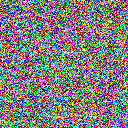

In [10]:
pred = noise.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

In [ ]:
steps= 10000

In [8]:
eta = 1 / 10000

In [24]:
I_0 = noise

In [25]:
def inference(I_0, t):
    pred = model(I_0, t)
    I_0 = I_0 - eta*pred
    return I_0

In [ ]:
for t in range(10000, -1, -1):
    I_0 = inference(I_0, t-1)

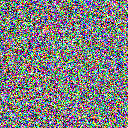

In [27]:
pred = I_0.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

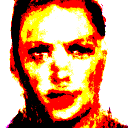

In [30]:
eta = t
while eta > 0:
    I_0 = inference(I_0, eta)
    eta = eta - 0.01

pred = I_0.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

In [6]:
model_0 = NNDenoiser().to(device)
state_dict = torch.load("artifacts/pos/best.pt", map_location="cpu")
model_0.load_state_dict(state_dict)
model_0.eval()

NNDenoiser(
  (net): Sequential(
    (0): Linear(in_features=49152, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.2, inplace=False)
    (5): Linear(in_features=1024, out_features=512, bias=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=512, out_features=256, bias=True)
    (9): ReLU()
    (10): Dropout(p=0.2, inplace=False)
    (11): Linear(in_features=256, out_features=512, bias=True)
    (12): ReLU()
    (13): Dropout(p=0.2, inplace=False)
    (14): Linear(in_features=512, out_features=1024, bias=True)
    (15): ReLU()
    (16): Dropout(p=0.2, inplace=False)
    (17): Linear(in_features=1024, out_features=2048, bias=True)
    (18): ReLU()
    (19): Dropout(p=0.2, inplace=False)
    (20): Linear(in_features=2048, out_features=49152, bias=True)
    (21): Tanh()
  )
)

In [140]:
def inference(I_0,eta):
    pred = model_0(I_0)
    I_0 = I_0 - eta*pred
    return I_0
    

In [184]:
t_i = map(t).flatten()
I_1 = I_0 + positional_encoded[t_i,:].view(1, 3,128,128)

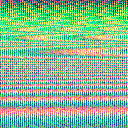

In [171]:
pred = I_1.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

In [201]:
eta = 0.001
for _ in range(100):
    I_1 = inference(I_1, eta)

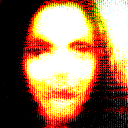

In [202]:
pred = I_1.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

In [1]:
import torch

In [4]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

In [15]:
t_int = torch.randint(0, 10000, (4, 1,1,1), device=device)

In [16]:
t_int

tensor([[[[6954]]],


        [[[6662]]],


        [[[6552]]],


        [[[3793]]]], device='cuda:0')

In [17]:
t = t_int.float() / 10000

In [18]:
t

tensor([[[[0.6954]]],


        [[[0.6662]]],


        [[[0.6552]]],


        [[[0.3793]]]], device='cuda:0')

In [19]:
images = torch.randn(4, 3, 128, 128).to(device)

In [20]:
noise = torch.randn_like(images)

In [21]:
from Generator.add_noise import add_noise

In [22]:
images.shape

torch.Size([4, 3, 128, 128])

In [14]:
t.shape

torch.Size([4, 1])

In [23]:
xt = add_noise(images, t, noise)

In [24]:
xt.shape

torch.Size([4, 3, 128, 128])

In [39]:
positional_encded = positional_encoding(5000, 128*128*3)

In [48]:
t = torch.rand(4, 1, 1, 1).to(device)

In [50]:
def map(t):
    return torch.clamp((t * 5000).long(), 0, 4999)

In [ ]:
t_i = map(t).flatten().to(device)

In [ ]:
positional_encded = positional_encded.to(device)

torch.Size([5000, 49152])

In [ ]:
positional_encded[t_i, :].view(4,3, 128,128)

torch.Size([4, 49152])

In [1]:
%pwd

'/home/bishwa/Unversity/Un-Conditional-Image-Generator/Research'

In [2]:
import os
os.chdir("../")

In [3]:
root_dir = "data"
images = [
            os.path.join(root_dir, f)
            for f in os.listdir(root_dir)
            if f.lower().endswith((".png", ".jpg", ".jpeg"))
        ]

In [205]:
len(images)

17534

In [26]:
import torchvision.transforms as T

In [27]:
from PIL import Image
transform = T.Compose([
    T.Resize(128),
    T.CenterCrop(128),
    T.ToTensor(),
    T.Normalize([0.5]*3, [0.5]*3) 
])

In [ ]:
Image.open(images[0])

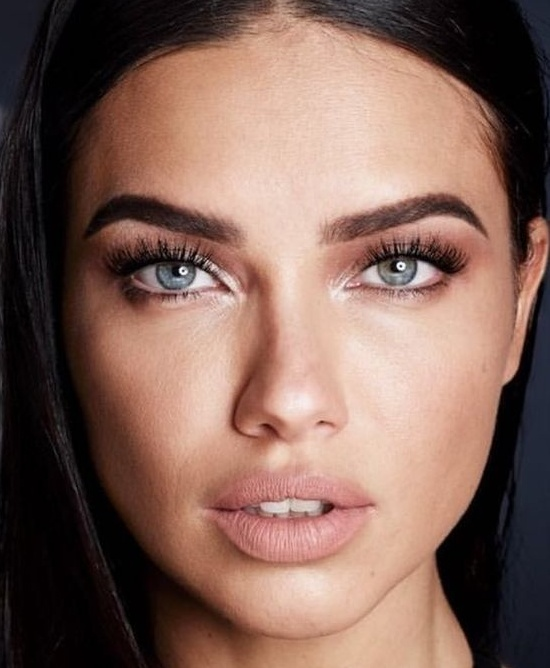

In [30]:
Image.open("data/Adriana Lima0_0.jpg")

In [28]:
img = transform(Image.open("data/Adriana Lima0_0.jpg"))

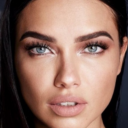

In [32]:
T.ToPILImage()(denormalize(img).clamp(0,1))

In [33]:
from Generator.add_noise import add_noise

In [ ]:
class DiffusionDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.paths = image_paths
        self.transform = transform

    def __getitem__(self, idx):
        img = Image.open(self.paths[idx]).convert("RGB")
        img = self.transform(img)

        t = torch.rand(1)
        noise = torch.randn_like(img)
        xt = add_noise(img.unsqueeze(0), t.view(1,1,1,1), noise.unsqueeze(0))

        return xt.squeeze(0), noise, t

    def __len__(self):
        return len(self.paths)


In [218]:
torch.stack(images_list).shape

torch.Size([2, 1000, 3, 128, 128])

# IMAGE GENERATOR

In [10]:
from Generator.NN import NNDenoiser
from torchvision import transforms as T
import torch
import os

In [4]:
def denormalize(x):
    # x in [-1, 1]
    return (x + 1) / 2

In [5]:
os.chdir('../')

In [7]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
model = NNDenoiser().to(device)
state_dict = torch.load("artifacts/new/model_45.pt", map_location="cpu")
model.load_state_dict(state_dict)
model.eval()

NNDenoiser(
  (net): Sequential(
    (0): Linear(in_features=49152, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU()
    (6): Linear(in_features=4096, out_features=49152, bias=True)
  )
)

In [8]:
def inference(I_0, t):
    pred = model(I_0, t)
    I_0 = I_0 - (1/1000)*pred
    return I_0

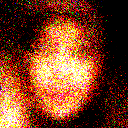

In [ ]:
noise = torch.randn(1, 3, 128, 128).to(device)
I_0 = noise
for t in range(3000, -1, -1):
    I_0 = inference(I_0.to(device), torch.tensor(t-1).unsqueeze(0).to(device))

pred = I_0.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

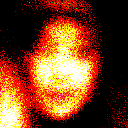

In [33]:
#I_0 = noise
for t in range(200, -1, -1):
    I_0 = inference(I_0.to(device), torch.tensor(t-1).unsqueeze(0).to(device))

pred = I_0.squeeze(0)
image = denormalize(pred)
image = T.ToPILImage()(image.clamp(0,1))
image

In [26]:
image_0 = image